In [18]:
from collections import Counter
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

In [19]:
#загружаем таблицу
data = pd.read_csv('train.csv')
#data = data[data['Fare'] > 1.0]
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data = data.drop(['Name', 'SibSp', 'Parch', 'Ticket','Cabin', 'Embarked','PassengerId'], axis=1)
data_ = data.dropna()


In [21]:
for col in ['Sex']:
    data_ = pd.concat([data_, pd.get_dummies(data_[col])], axis=1)
    data_ = data_.drop(col, axis=1)


y=[[1,0] if el == 1 else [0,1] for el in data_['Survived']]

data_ = data_.drop(['Survived'], axis=1)

In [22]:
data_.head(5)
data_ = StandardScaler().fit(data_).transform(data_)

In [24]:
print(y)
print(len(y))
x_train, x_test, y_train, y_test = train_test_split(data_, y, test_size=0.2)

[[0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1],

In [288]:
#переходим к деревьям: 
model = DecisionTreeClassifier(max_depth = 10)
model.fit(x_train, y_train) 
print(roc_auc_score(model.predict(x_test), y_test))

0.7867647058823529


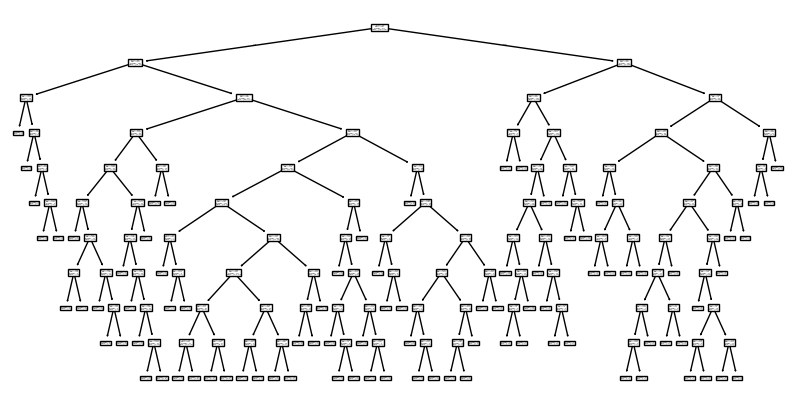

In [210]:
plt.figure(figsize=(10, 5))
a=plot_tree(model)


In [295]:
new_passengers = pd.DataFrame({
    'Pclass': [1,2],  # классы билетов
    'Age': [90,80],  # возраст
    'Fare': [0.0, 10.0],  # стоимость билета
    'Sex_male': [0,1],  # пол (0 - женский, 1 - мужской)
    'Sex_female': [1,0]
})
new_passengers = StandardScaler().fit_transform(new_passengers)
predictions = model.predict(new_passengers)
print(predictions)

[[1 0]
 [1 0]]


C:\Users\ilyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
